In [62]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(ggcorrplot)

#### read data 

In [3]:
cohort_df = read.csv('~/Downloads/raw-data/cohort.csv')

In [4]:
head(cohort_df)

,smoke,female,age,cardiac,cost
,<int>,<int>,<int>,<int>,<int>
1,0,1,48,0,9273
2,0,1,39,0,8636
3,0,1,46,0,8974
4,0,0,43,0,9242
5,0,1,25,0,8404
6,0,0,38,0,9239


#### summarize variable data types, distributions, and statistics

In [18]:
# variable 'smoke' is a binary variable with values 0 and 1
table(cohort_df$smoke) 


   0    1 
4211  789 

In [19]:
# variable 'female' is a binary variable with values 0 and 1
table(cohort_df$female)


   0    1 
2226 2774 

In [21]:
# variable 'age' is a numerical variable with values ranging from 18 to 70
summary(cohort_df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   31.00   44.00   43.94   57.00   70.00 

In [22]:
# variable 'cardiac' is a binary variable with values 0 and 1
table(cohort_df$cardiac)


   0    1 
4750  250 

In [20]:
# variable 'cost' is a numerical variable with values ranging from 7878 to 10790
summary(cohort_df$cost)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7878    8874    9143    9166    9426   10790 

In [88]:
head(cohort_df)

,smoke,female,age,cardiac,cost
,<int>,<int>,<int>,<int>,<int>
1,0,1,48,0,9273
2,0,1,39,0,8636
3,0,1,46,0,8974
4,0,0,43,0,9242
5,0,1,25,0,8404
6,0,0,38,0,9239


#### Examine the correlation between variables


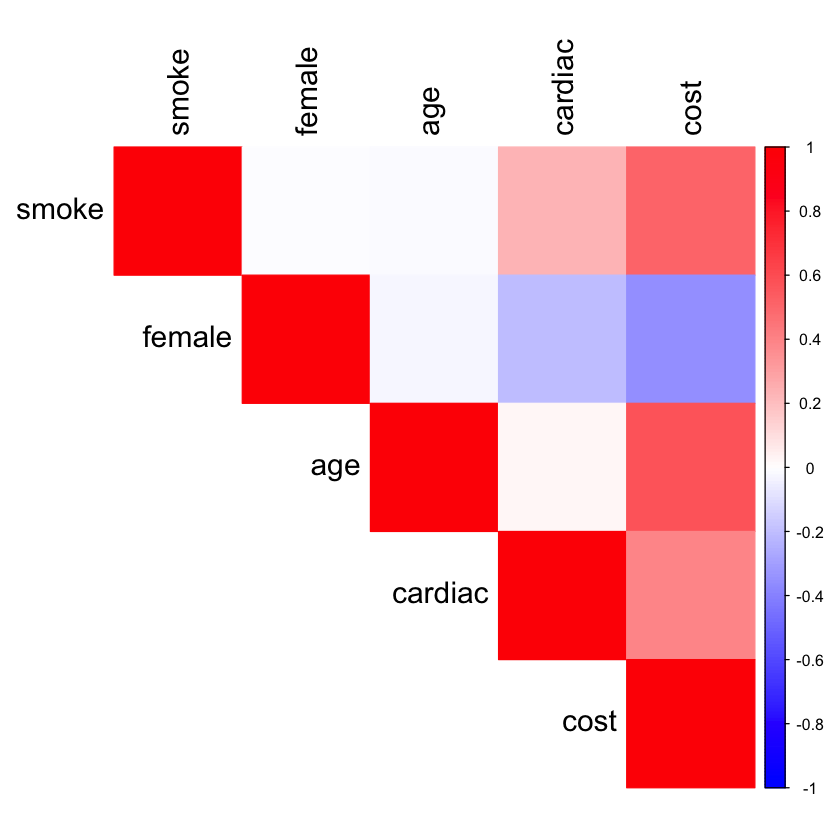

In [105]:
cor_matrix <- cor(cohort_df)
corrplot(cor_matrix, 
         method = "color",    
         type = "upper",       
         col = colorRampPalette(c("blue", "white", "red"))(200),
         tl.cex = 1.5,  
         number.cex = 1,
         tl.col = "black")  

#### Analysis

In [53]:
# build a model to predict the probability of cardiovascular disease based on multiple variables
model <- glm(cardiac ~ smoke + female + age , data = cohort_df, family = binomial)

In [54]:
summary(model)


Call:
glm(formula = cardiac ~ smoke + female + age, family = binomial, 
    data = cohort_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9702  -0.3345  -0.1100  -0.0983   3.3032  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.186602   0.236180 -13.492   <2e-16 ***
smoke        2.111761   0.141071  14.969   <2e-16 ***
female      -2.466895   0.203725 -12.109   <2e-16 ***
age          0.008083   0.004676   1.729   0.0839 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1985.2  on 4999  degrees of freedom
Residual deviance: 1547.2  on 4996  degrees of freedom
AIC: 1555.2

Number of Fisher Scoring iterations: 7


In [116]:
# Compute odds based on regression results
# For 'smoke': smoking increases the odds of cardiovascular disease by a factor of 8.263
exp(2.111761) 
# For 'female': being a female decreases the odds of cardiovascular disease by a factor of 0.085
exp(-2.466895) 
# For 'age': one unit increase in age increases the odds of cardiovascular disease by a factor of 1.008
exp(0.008083) 

[1] 8.262779

[1] 0.0848479

[1] 1.008116